In [100]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import json

from sklearn.metrics import f1_score

import sys
import os

path = os.path.abspath(os.getcwd()) + '/../data_load'
sys.path.insert(0, path)

from movie_data import MovieData

%matplotlib inline

In [101]:
moviedata = MovieData(min_genre_frequency=0.05)
print(moviedata.genre_labels)

['Action' 'Adventure' 'Biography' 'Comedy' 'Crime' 'Drama' 'Family'
 'Fantasy' 'Horror' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller']


In [120]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.7,
    analyzer='word',
    ngram_range=(1, 1),
    max_features=10000,
    stop_words='english'
)

X = vectorizer.fit_transform(moviedata.plots)

In [121]:
#vectorizer.get_feature_names()
X.todense().shape

(5029, 10000)

In [222]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000)
XX = pca.fit_transform(X.todense())

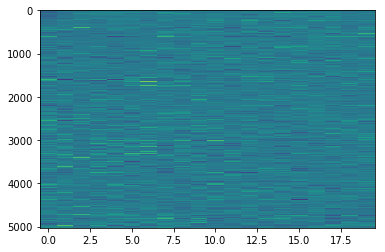

In [137]:
plt.imshow(XX, aspect='auto')

In [223]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.todense(),
    moviedata.one_hot_genres,
    test_size=0.4, 
    random_state=42)

In [224]:
XX.shape

(5029, 2000)

## Least Squares

In [ ]:
genre_coeffs = []
scores = []

for i, label in enumerate(moviedata.genre_labels):
    coeffs = np.linalg.lstsq(X_train, y_train[:, i])[0]
    genre_coeffs.append(coeffs)
    y_pred = np.dot(X_test, coeffs)
    y_pred = np.array(y_pred > 0.25, dtype=int)
    score = f1_score(y_test[:, i], y_pred)
    scores.append(score)
    print("Genre: {}, Score: {}".format(labels[i], score))
    
    
#np.linalg.lstsq(X_train, y_train[:, 0])[0]

In [ ]:
np.mean(scores)

## RandomForrest Model

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

clf = RandomForestClassifier(n_estimators=25, max_features='auto', max_depth=None)
clf.fit(X_train, y_train)
y_guess_probs = clf.predict_proba(X_test)
y_guess = clf.predict(X_test)

scores = f1_score(y_test, y_guess, average=None)

for item in list(zip(moviedata.genre_labels, scores)):
    print("{} {:.2f}".format(item[0], item[1]))


print("Average {:.3f}".format(np.mean(scores)))


Action 0.28
Adventure 0.23
Biography 0.03
Comedy 0.45
Crime 0.28
Drama 0.68
Family 0.05
Fantasy 0.09
Horror 0.14
Mystery 0.10
Romance 0.27
Sci-Fi 0.15
Thriller 0.14
Average 0.223


In [202]:
np.mean(scores)

0.22058409371466253

## Logrithmic

In [192]:
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn import utils

X_train, X_test, y_train, y_test = train_test_split(
    XX,
    moviedata.one_hot_genres,
    test_size=0.1,
    random_state=43
)

Action 0.66
Adventure 0.51
Biography 0.26
Comedy 0.63
Crime 0.62
Drama 0.72
Family 0.25
Fantasy 0.22
Horror 0.48
Mystery 0.28
Romance 0.59
Sci-Fi 0.44
Thriller 0.41
Mean f1 score: 0.466


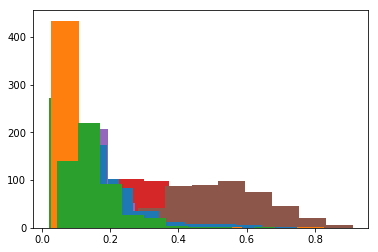

In [193]:
scores = []

for i, label in enumerate(moviedata.genre_labels):
    clf = LogisticRegression()
    clf.fit(X_train, y_train[:, i])
    y_pred_probs = clf.predict_proba(X_test)[:, 1]
    plt.hist(y_pred_probs)
    y_pred = np.array(y_pred_probs > np.mean(y_pred_probs), dtype=int)
    score = f1_score(y_test[:, i], y_pred)
    scores.append(score)
    print("{} {:.2f}".format(label, score))
    
print('Mean f1 score: {:.3f}'.format(np.mean(scores)))